In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=3, random_state=42) 

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='ovr', random_state=42)

In [7]:
log_reg.fit(X_train, y_train)

/Users/satviksawhney/Downloads/AIML/Krish Naik/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', random_state=42)

In [8]:
y_pred = log_reg.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.65

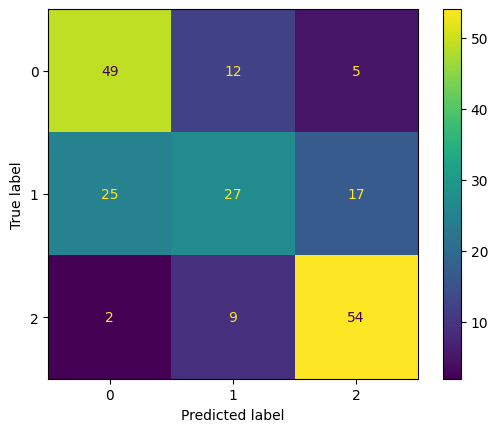

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
confusion_matrix_res = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix_res, display_labels=log_reg.classes_).plot()

## Imbalanced Dataset

In [16]:
X, y = make_classification(n_samples=1000, n_features=10, n_clusters_per_class=1, n_redundant=0, random_state=422, weights=[0.95])

In [18]:
X=pd.DataFrame(X)
y=pd.Series(y)

In [22]:
y.value_counts()

0    942
1     58
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
penalty = ['l1', 'l2', 'elasticnet']
C = [100, 10, 1, 0,1, 0,]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = [{0:w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

param_grid = {
    'penalty':penalty,
    'C':C,
    'solver':solver,
    'class_weight':class_weight
}

In [28]:
from sklearn.model_selection import GridSearchCV
g_cv = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [29]:
g_cv.fit(X_train, y_train)

/Users/satviksawhney/Downloads/AIML/Krish Naik/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/satviksawhney/Downloads/AIML/Krish Naik/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/satviksawhney/Downloads/AIML/Krish Naik/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/satviksawhney/Downloads/AIML/Krish Naik/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/satviksawhney/Downloads/AIML/Krish Naik/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarni

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0, 1, 0],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [30]:
g_cv.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [31]:
g_cv.best_score_

np.float64(0.9862500000000001)

In [32]:
y_pred = g_cv.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc_score = accuracy_score(y_test, y_pred)
pre_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)
acc_score, pre_score, rec_score, f_score

(0.97, 1.0, 0.625, 0.7692307692307693)